# Advertising Dataset

###Objective  -- Whether Advertising is really helping or not for increasing our sales

1. Create Model
2. Test Assumptions
3. See how to enhance the efficiency of the model by improving the Rsquare model.

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [294]:
adv = pd.read_csv('Advertising.csv')

In [295]:
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [296]:
adv.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [297]:
adv.shape

(200, 5)

In [298]:
adv.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [299]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [300]:
adv.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [301]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [302]:
adv.isnull().sum() 

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [303]:
#We are renaming the first column

adv.rename({'Unnamed: 0' : 'Serial No.'},axis = 1,inplace = True)
adv.head()

,Serial No.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [304]:
adv.set_index(['Serial No.'], inplace = True)

In [305]:
adv.head()

,TV,Radio,Newspaper,Sales
Serial No.,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


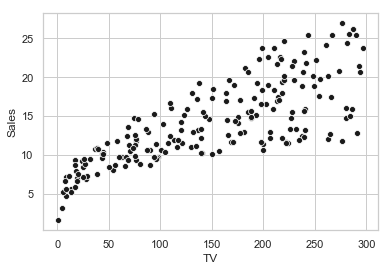

In [306]:
sns.scatterplot(adv['TV'], adv.Sales, color = 'k')
plt.show()

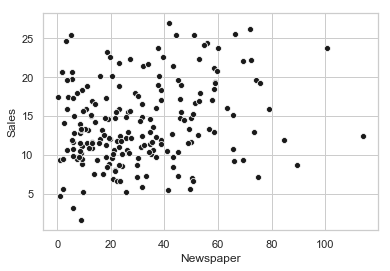

In [307]:
sns.scatterplot(adv['Newspaper'], adv.Sales, color = 'k')
plt.show()

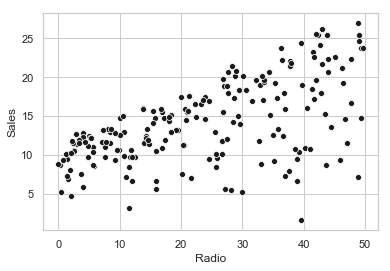

In [308]:
sns.scatterplot(adv['Radio'], adv.Sales, color = 'k')
plt.show()

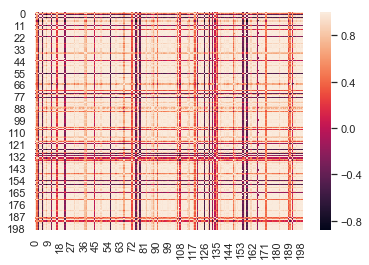

In [309]:
sns.heatmap(np.corrcoef(adv))

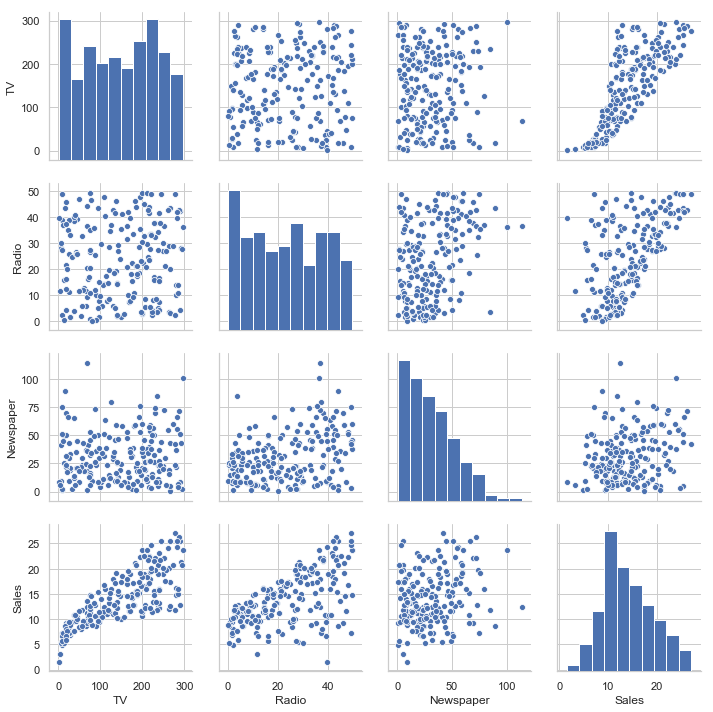

In [310]:
# Find Inferences from a pair plot such as relationship and normality of variables

sns.pairplot(adv.iloc[:,:8])
plt.show()

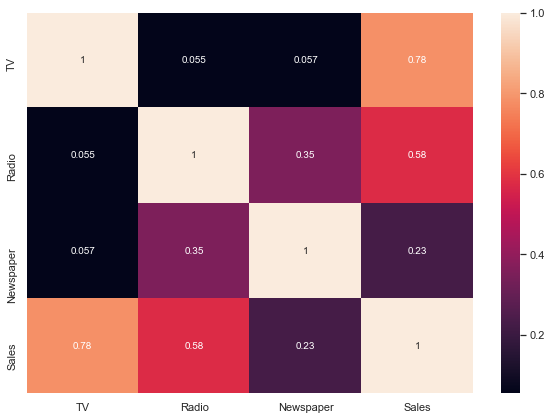

In [311]:
plt.subplots(figsize=(10,7))
sns.heatmap(adv.iloc[:,:8].corr(), annot= True)

In [312]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Model Building Process by splitting the data in x and y

We will split the data in x and y, and then we will build our model using statsmodel.api package

### Note - Always add constant if the model is being built using statsmodel.api package. This helps in calclulating the intercept in Linear model

In [313]:
import statsmodels.api as sm

x = adv.drop("Sales", axis = 1)
y = adv.Sales

model_adv = sm.OLS(y,x).fit()
pred_adv = model_adv.predict(x)

In [314]:
fittedvals = model_adv.fittedvalues
residuals = model_adv.resid
Rsq = model_adv.rsquared
print(Rsq)

0.9819180990604569


## Plot 1 - Residual Plot

This plot is meant to check the linearity of the data. We will plot it between the fitted values and Residuals

In [315]:
##Fitting the values

st_residual = model_adv.get_influence().resid_studentized_internal

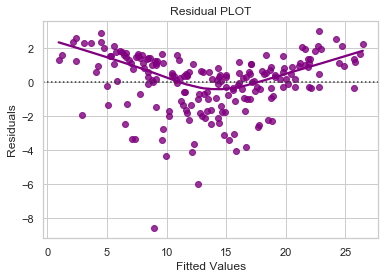

In [316]:
sns.set(style = 'whitegrid')
ax = sns.residplot(fittedvals, residuals, color='purple', lowess = True)
ax.set(xlabel = 'Fitted Values', ylabel = 'Residuals', title = 'Residual PLOT')
plt.show()

# Plot 2 - Q - Q Plot | Quantile Quantile Plot

This plot is used to check the normality of the data. We will plot it bw the quantiles(studentized residuals)

In [317]:
import scipy.stats as stats
import pylab

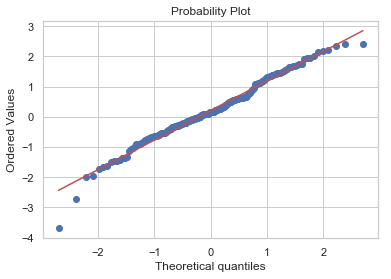

In [318]:
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

## Ths plot shows that the residuals are not normal

## Test 1 - Test of Normality - Shapiro Test

H0 - The data is following the Gaussian pattern

Ha - Data is not following the Gaussian pattern

In [319]:
from scipy.stats import shapiro

In [320]:
test = shapiro(model_adv.resid)
test
##Bcoz the p-value of the test is less than 0.05, hence we reject the null and conclude that the data is not following
##Gaussian pattern

(0.9837928414344788, 0.02110707387328148)

In [321]:
if test[1]<0.05:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


## Test 2 - Test of Heteroscedasticity - Goldfeld Quandt Test

H0 - The data is homoscedastic(Uniform Variance)

Ha - Data is heteroscedastic(Unequal Variance)

In [322]:
from statsmodels.stats.api import het_goldfeldquandt

In [323]:
het_goldfeldquandt(y,x)

## We failed to reject the H0 -- So the data is not heteroscedasticity

##Here p > 0.05, we accept the H0

(1.1113720708359467, 0.30204138751174264, 'increasing')

## Plot 3 - Scale Location Plot | Heteroscedasticity

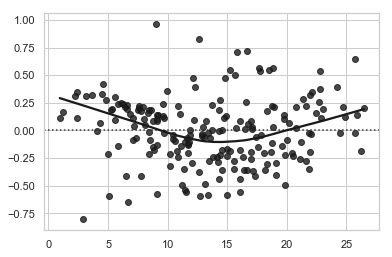

In [324]:
st_residual = model_adv.get_influence().resid_studentized_internal
sns.residplot(model_adv.fittedvalues, np.sqrt(np.abs(st_residual)), lowess = True , color = 'k')

## Test 3 - Test of Linearity - Rainbow Test

H0 - The data is following the linear pattern

Ha - Data is not following the linear pattern

In [325]:
##Apply all the tests

##Test of linearity

from statsmodels.stats.api import linear_rainbow

In [326]:
linear_rainbow(model_adv)   ##Here we failed to reject null as p value is more than 0.05

(0.9011628312360568, 0.6971094281960708)

## Test 4 - Test of Autocorrelation - Durbin Watson Test

H0 - The data is homoscedastic(Uniform Variance)

Ha - Data is heteroscedastic(Unequal Variance)

In [327]:
##Other Way to find Durbin - Watson test value

from statsmodels.stats.stattools import durbin_watson

In [328]:
durbin_watson(model_adv.resid, axis = 0)

2.038052236324091

In [329]:
##Summary gives us the Durbin-Watson test value

model_adv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):          2.43e-171
Time:                        02:02:22   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test 5 - Multicollinearity Test

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values, col) 
                   for col in range(0,x.shape[1])]
vif

##No value is more than 5. So their is less multicollinearity between independent values.

,VIF Values
0,2.486772
1,3.285462
2,3.055245


In [331]:
## Error Metrices

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [332]:
#MAE

mean_absolute_error(y, pred_adv)

1.5340503613575798

In [333]:
##RMSE

np.sqrt(mean_squared_error(y, pred_adv))

2.011272003252183

In [334]:
##Splitting into test and train

##Packages for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [335]:
##Splitting the data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

##Creating the machine
lr = LinearRegression()

In [336]:
##Fitting and predicting

lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)

In [337]:
##Finding the error estimates - test error values
mean_absolute_error(ytest, lr_pred)

1.361781350209028

In [338]:
##RMSE
print(np.sqrt(mean_squared_error(ytest, lr_pred)))

2.098122563495681


In [339]:
##Finding the error estimates - test error values
mean_absolute_error(ytrain, lr.predict(xtrain))

1.2131871622729427

In [340]:
##RMSE
print(np.sqrt(mean_squared_error(ytrain, lr.predict(xtrain))))

1.5513912323520802


In [341]:
from sklearn.model_selection import cross_val_score

In [342]:
scores = cross_val_score(lr,x,y)
print(scores)
print("Average score %.2f" % scores.mean())

[0.90438089 0.86536009 0.9051984 ]
Average score 0.89


### Objective - Enhance the prediction power of the model

In [343]:
from sklearn.preprocessing import PolynomialFeatures

In [344]:
pf = PolynomialFeatures()

In [345]:
##Transformed the Input variables for a better modelling

x = pf.fit_transform(x)

In [346]:
model_adv = sm.OLS(y,x).fit()
pred_adv = model_adv.predict(x)

In [347]:
##Find the model 

print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.8972106381789522
0.8956373316204668


In [348]:
##Splitting the data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

##Creating the machine
lr = LinearRegression()

In [349]:
##Fitting and predicting

lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)

In [350]:
##Finding the error estimates - test error values
mean_absolute_error(ytest, lr_pred)

0.5074240406404378

In [351]:
##RMSE
print(np.sqrt(mean_squared_error(ytest, lr_pred)))

0.9464192277736282


In [352]:
##Finding the error estimates - test error values
mean_absolute_error(ytrain, lr.predict(xtrain))

0.38249550360313755

In [353]:
##RMSE
print(np.sqrt(mean_squared_error(ytrain, lr.predict(xtrain))))

0.500709431647324


In [354]:
from sklearn.model_selection import cross_val_score

In [355]:
scores = cross_val_score(lr,x,y)
print(scores)
print("Average score %.2f" % scores.mean())

[0.98853555 0.97251282 0.98416869]
Average score 0.98
